# 🛒 Walmart Sales Forecasting & Time Series Analysis
This notebook analyzes the Walmart Sales Forecasting dataset from Kaggle. We will explore trends, moving averages, seasonal patterns, and perform a breakdown by product and region. Finally, we add a simple forecast using exponential smoothing.

## Load and Explore Dataset

In [1]:
import pandas as pd

# Load dataset (update path if needed)
df = pd.read_csv("data/train.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Aggregate to Monthly Sales

C:\Users\hamza\AppData\Local\Temp\ipykernel_7076\1652225968.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Date'>

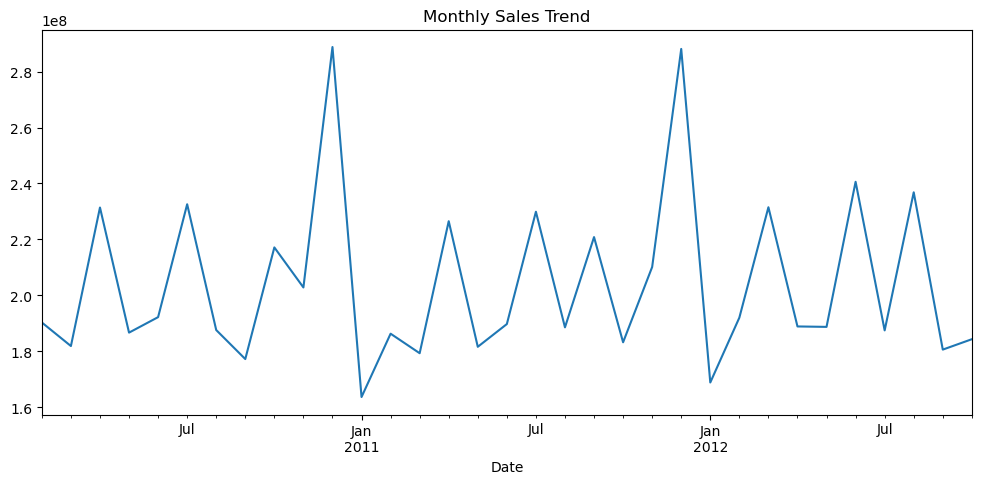

In [2]:
# Aggregate to monthly sales
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()

monthly_sales.plot(figsize=(12,5), title="Monthly Sales Trend")

## Moving Averages

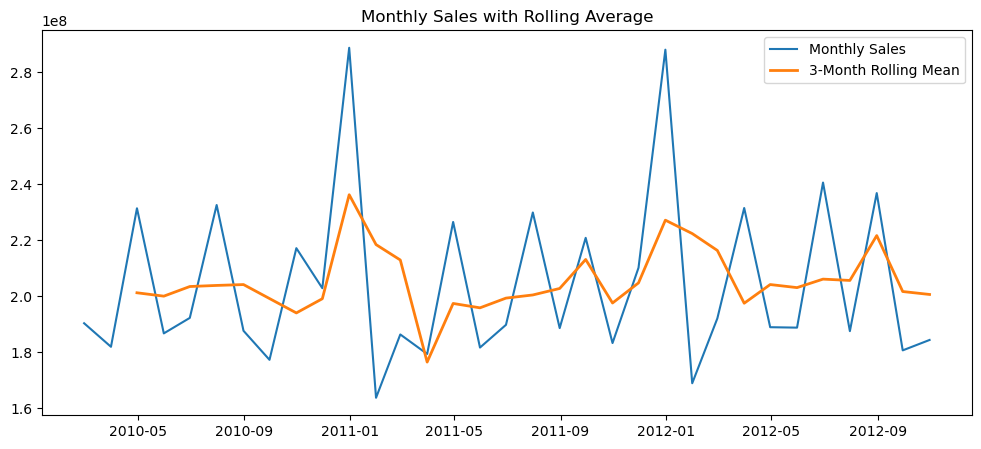

In [3]:
monthly_sales_rolling = monthly_sales.rolling(window=3).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales, label="Monthly Sales")
plt.plot(monthly_sales_rolling, label="3-Month Rolling Mean", linewidth=2)
plt.title("Monthly Sales with Rolling Average")
plt.legend()
plt.show()

## Seasonal Decomposition

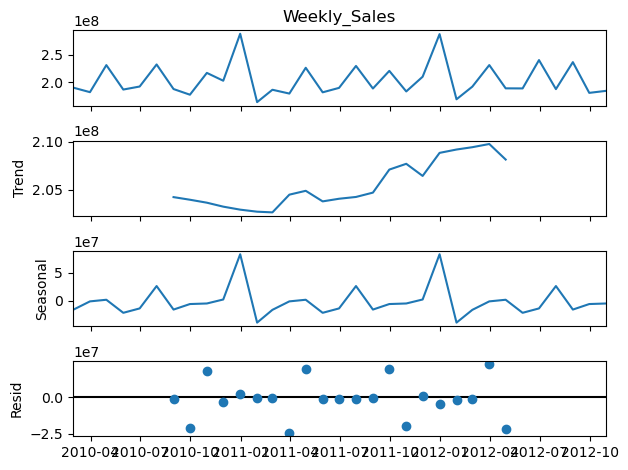

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()

## Breakdown by Product & Region

C:\Users\hamza\AppData\Local\Temp\ipykernel_7076\814191655.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dept_sales = df.groupby(['Dept', pd.Grouper(key='Date', freq='M')])['Weekly_Sales'].sum().reset_index()


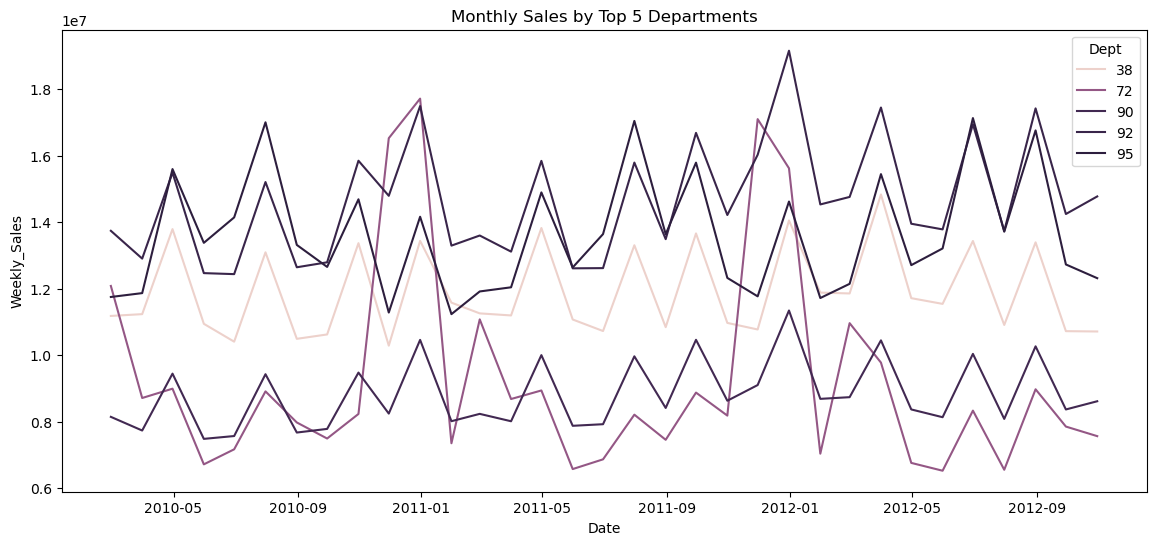

In [5]:
# Sales by department
dept_sales = df.groupby(['Dept', pd.Grouper(key='Date', freq='M')])['Weekly_Sales'].sum().reset_index()

# Top 5 departments
top_depts = dept_sales.groupby('Dept')['Weekly_Sales'].sum().nlargest(5).index
dept_filtered = dept_sales[dept_sales['Dept'].isin(top_depts)]

import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(data=dept_filtered, x="Date", y="Weekly_Sales", hue="Dept")
plt.title("Monthly Sales by Top 5 Departments")
plt.show()

## Simple Forecasting (Exponential Smoothing)

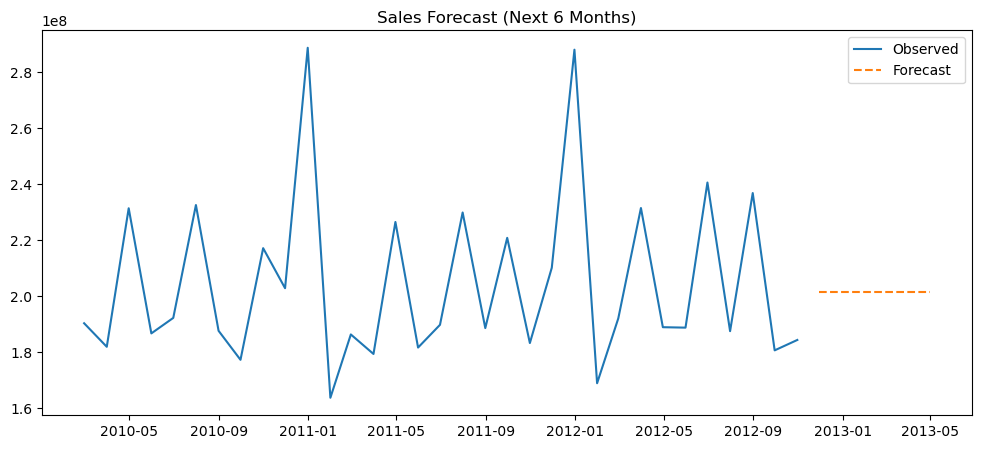

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit model
model = SimpleExpSmoothing(monthly_sales).fit(smoothing_level=0.2, optimized=False)
forecast = model.forecast(6)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales, label="Observed")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title("Sales Forecast (Next 6 Months)")
plt.legend()
plt.show()